## Blending ve Pasting İşlemleri

---

*Gerekli kütüphanelerin import edilmesi ve resimlerin okunup ekrana basılması*

In [1]:
import cv2

In [2]:
img1= cv2.imread('Images/dog.jpg')
img2 = cv2.imread('Images/warning.jpg')

In [3]:
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

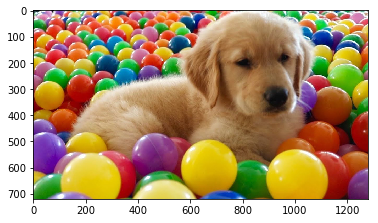

In [5]:
plt.imshow(img1_rgb)

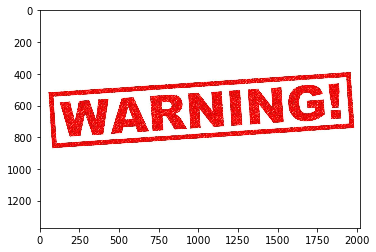

In [6]:
plt.imshow(img2_rgb)

*İki resmimizinde boyutları farklı olduğu için boyutlarını eşitlememiz gerekmektedir.*

In [7]:
img1_rgb.shape

(720, 1280, 3)

In [8]:
img2_rgb.shape

(1372, 2020, 3)

In [9]:
img1_rgb = cv2.resize(img1_rgb,(1200,1200))
img2_rgb = cv2.resize(img2_rgb,(1200,1200))

*İki fotoğradında boyutlarını eşitledikten sonra **blend** işlemini gerçekleştirebiliriz.*

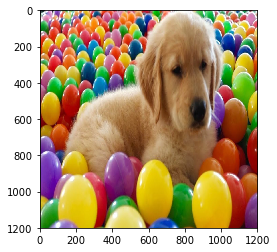

In [10]:
plt.imshow(img1_rgb)

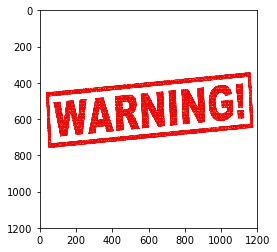

In [11]:
plt.imshow(img2_rgb)

In [12]:
blended = cv2.addWeighted(src1=img1_rgb,alpha=0.5,src2=img2_rgb,beta=0.5,gamma=0)

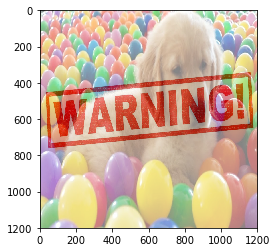

In [13]:
plt.imshow(blended)

**AddWeighted** fonksiyonunu iki resiminde boyutları eşit olduğu zaman kullanabiliriz.

*İki farklı boyuttaki resimi yapıştırma işlemi.*

In [14]:
img1= cv2.imread('Images/dog.jpg')
img2 = cv2.imread('Images/warning.jpg')
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_rgb=cv2.resize(img2_rgb,(600,600))

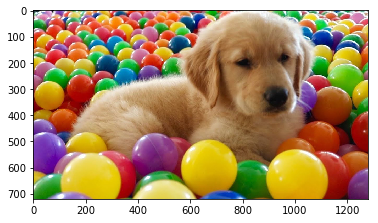

In [15]:
plt.imshow(img1_rgb)

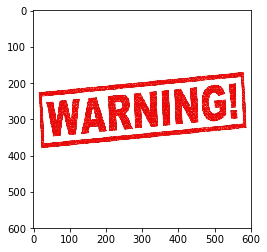

In [16]:
plt.imshow(img2_rgb)

In [17]:
large_img = img1_rgb
small_img = img2_rgb

In [18]:
x_offset = 0 
y_offset = 0

In [19]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [20]:
small_img.shape

(600, 600, 3)

In [21]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

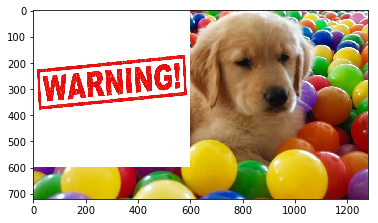

In [22]:
plt.imshow(large_img)

### Farklı boyutlarda ki fotoğrafların blend yapılması

In [23]:
img1= cv2.imread('Images/dog.jpg')
img2 = cv2.imread('Images/warning.jpg')
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [24]:
img2_rgb = cv2.resize(img2_rgb,(600,600))

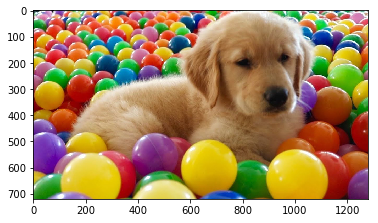

In [25]:
plt.imshow(img1_rgb)

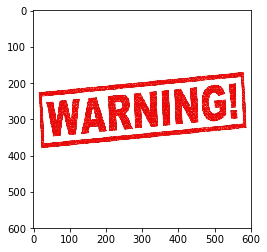

In [26]:
plt.imshow(img2_rgb)

In [27]:
img1_rgb.shape

(720, 1280, 3)

In [28]:
img2_rgb.shape

(600, 600, 3)

In [29]:
x_offset = 1280 - 600
y_offset = 720 - 600

In [30]:
rows, cols, channels = img2_rgb.shape

In [31]:
rows

600

In [32]:
cols

600

In [33]:
channels

3

In [34]:
roi = img1_rgb[y_offset:720,x_offset:1280]

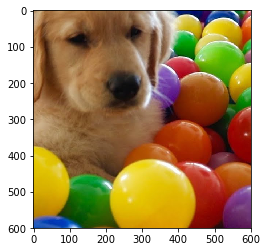

In [35]:
plt.imshow(roi)

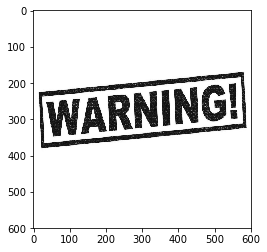

In [36]:
img2gray = cv2.cvtColor(img2_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

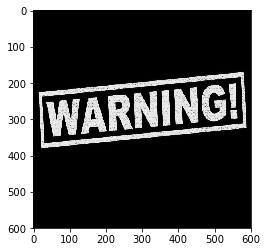

In [37]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [38]:
mask_inv.shape

(600, 600)

In [39]:
import numpy as np

In [40]:
white_backround = np.full(img2_rgb.shape,255,dtype=np.uint8)

In [41]:
white_backround.shape

(600, 600, 3)

*white backround*

In [42]:
bk = cv2.bitwise_or(white_backround,white_backround,mask=mask_inv)

In [43]:
bk.shape

(600, 600, 3)

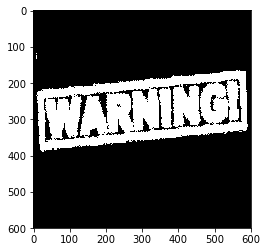

In [44]:
plt.imshow(bk)

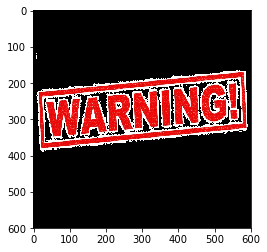

In [45]:
fg = cv2.bitwise_or(img2_rgb,img2_rgb,mask=mask_inv)
plt.imshow(fg)

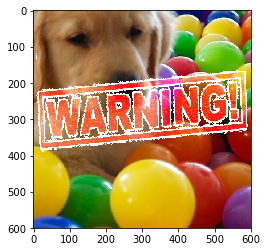

In [46]:
final_roi =cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [47]:
large_img = img1_rgb
small_img =final_roi

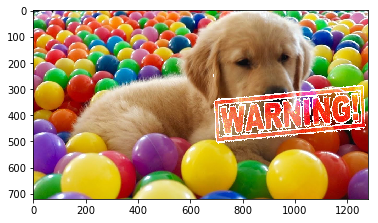

In [48]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)